Чек лист для изучения модели:

1) Как формулируется задача математически

2) Как выводится решение для весов модели исходя из пункта 1

3) Какие регуляризации используются. Как они влияют на п.1 и п.2

4) Как предобрабатывать данные для модели

5) Желательно имплементировать модель самостоятельно через numpy (или torch)

6) Какие библиотеки содержат имплементации. В чем разница между имплементациями, если их несколько

7) Обучить на датасете. Сравнить разные имплементации по скорости, памяти и качеству

8) Как контролировать обучение модели

9) Как посмотреть важность признаков. Что ещё можно полезного извлечь из обученной модели

# **Линейная регрессия**

## Пункты 1-2

Уравнение модели имеет следующий вид:

$\hat{y_{i}} = w_{0} + \sum_{j=1}^{n}w_{j}x_{ij}$, где w - веса, x - значения признаков, y - предсказания

Поскольку сумма в верхней формуле - это скалярное произведение, то перепишем её:

$\hat{y_{i}} = w_{0} + \langle w, x_{i} \rangle$

Если принять, что $x_{0}$ = 1, то формула примет следующий вид:

$\hat{y_{i}} = \langle w, x_{i} \rangle$


Матричный вид

$y = X*w$

$X^T*y = X^T*X*w$

$(X^T*X)^{-1}*X^T*y = (X^T*X)^{-1}*X*X^T*w$

$w = (X^T*X)^{-1}*X^T*y$

Псевдообратная матрица даёт решение с наименьшей квадратичной ошибкой

Тогда наша задача сводится к следующему:

MSE = $\frac{1}{n} \sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2 → min$ : благодаря своей дифференцируемости наиболее часто используется в задачах регрессии, однако плохо интерпретируется, потому что не сохраняет единицы измерения (будет квадрат)

------------------------------------------------------------------

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2} → min$ : помогает избежать проблему интерпретации MSE, подходит для сравнения двух моделей и контроля качества, но не позволяет сделать выводы о том, насколько хороша наша модель. Например, MSE = 100 - плохой показатель, если целевая переменная лежит в пределах от 1 до 10 и оченб хорошей, если в пределах от 1000000 до 10000000. В таких случаях принято использовать $R^2$ коэффицент:

$R^2 = 1 - \frac{\sum_{i=1}^{n}(\hat{y_{i}} - y_{i})^2}{\sum_{i=1}^{n}({y_{i}} - \bar{y_{i}})^2}$, где $\bar{y_{i}}$ - среднее значение целевой переменной.
Это по сути нормированная среднеквадратичная ошибка. Если она близка к единице, то модель имеет хорошее качество, если к нулю - близка с константным предсказанием.

------------------------------------------------------------------

MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid \hat{y_{i}} - y_{i} \mid → min$ : не дифференцируема, менее чувствительна к выбросам, более терпима к сильным ошибкам.

------------------------------------------------------------------

Рассмотрим пример (из лекции ВШЭ):
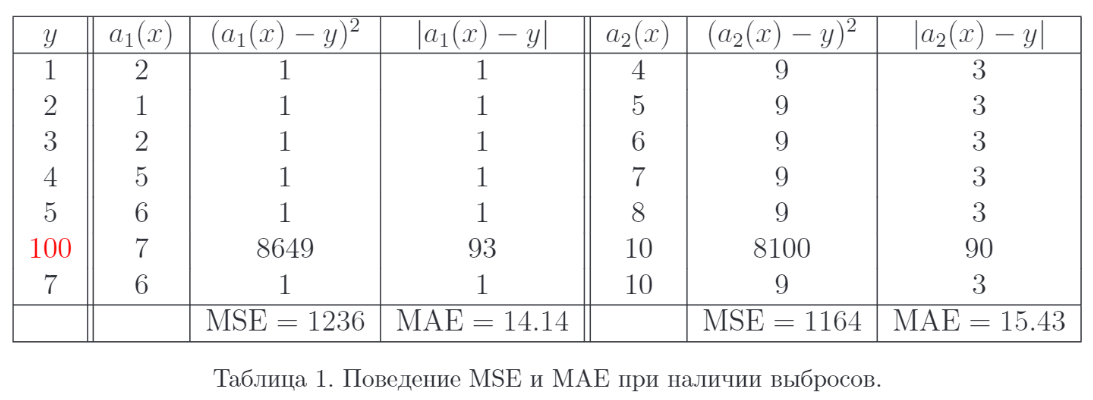

Выведем формулу $w = y*X^T(X^T*X)^{-1}$ с помощью векторного дифференцирования MSE:
$\mid\mid X*w - y \mid\mid^2_{2} → min$

$\mid\mid X*w - y \mid\mid^2_{2} = (X*w-y)^T(X*w-y) = w^T*X^T*X*w - w^T*X^T*y - y^T*X*w + y^Ty$

$\nabla\mid\mid X*w - y \mid\mid^2_{2} = 2*X^T*X*w - 2*X^T*y = 0$

$X^T*X*w = X^Ty$

$w = y*X^T(X^T*X)^{-1}$

Существуют также иные методы измерения ошибок в задачах линейной регрессии:

Huber Loss (объединение квадратичной и абсолютной). Недостаток - вторая производная имеет разрывы:

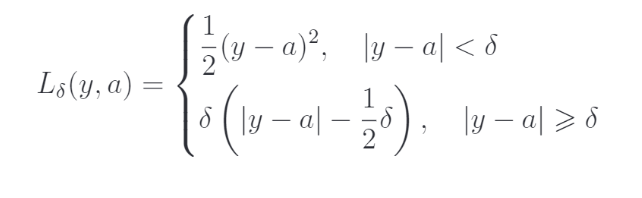

Log-Cosh (для маленьких поведений отклонение - квадратичное, для больших - линейное):

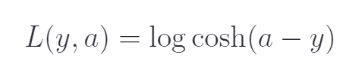

MSLE (подходит для задач с неотрицательной целевой переменной и неотрицательными прогнозами модели). Штрафует заниженные прогнозы сильнее, чем завышенные:

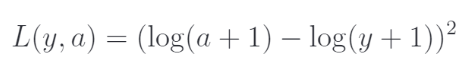

MAPE (позволяет работать с разными масштабами, если какой-то признак измеряется одновременно единицами и  тысячами):

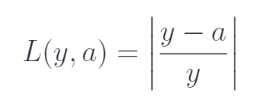

SMAPE:

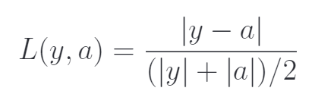

Квантильная функция потерь:

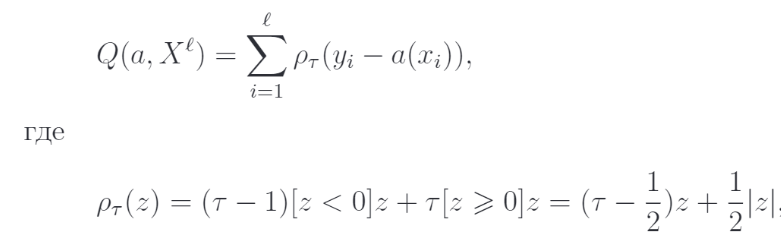

Градиентный спуск

$w = y*X^T(X^T*X)^{-1}$
Данное решение считается неоптимальным, поскольку:


*   обращение матрицы имеет сложность O($n^3$)
*   матрица $X^T*X$ может оказаться вырожденной, и тогда обращение будет невозможным
*   если заменить функционал MSE на другой, то решение для $w$, вероятнее всего, не получится

Эта проблема решается с помощью градиентного спуска:

$w^{k} = w^{k-1} - lr * ∇L(w^{k-1})$, где $lr$ - длина шага, который может меняться итеративно (например $\frac{1}{k}$) или быть константным



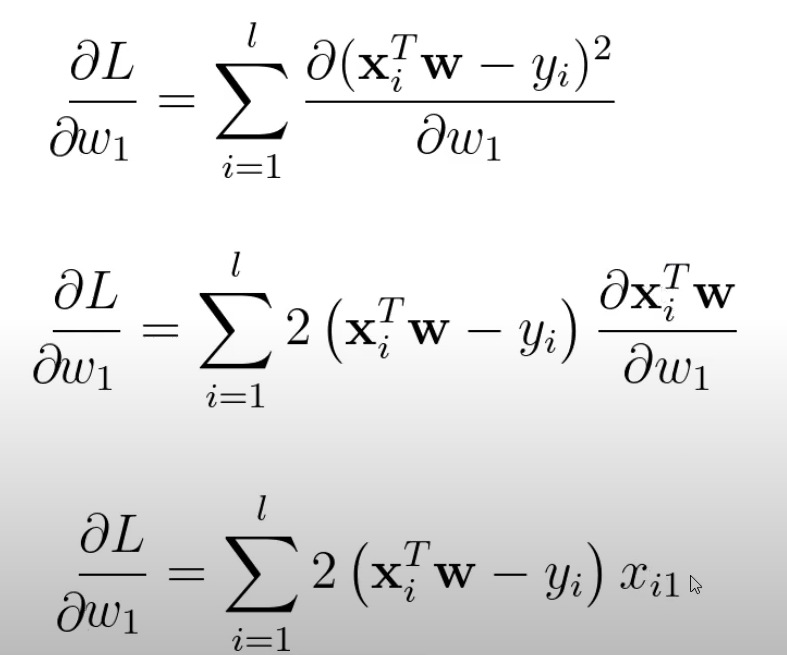

Виды градиентных спусков:


*   SGD - стохастический градиентный спуск, когда на каждой i-ой итерации случайно выбирается слагаемое
*   SAG - средний стохастический градиентный спуск
*   Метод инерции (momentum) - идея в нахождении направления движения градиента
*   AdaGrad - чем длиннее были сделаны шагы в начале, тем меньше будет текущий шаг; минус - преждевременное затухание градиента
*   RMSprop - используется экспоненциальное затухание градиентов
*   Adam 



## Пункт 3

$\hat{y_{i}} = \langle w, x_{i} \rangle + λ*R(w)$, где λ - параметр регуляризации, R(w) - регуляризатор

Наиболее часто используются $L_1$ и $L_2$ - регуляризаторы

$L_1 = \mid\mid w\mid\mid_1^2 = \sum_{i=1}^{n} \mid w_i \mid$

$L_2 = \mid\mid w\mid\mid_2^2 = \sum_{i=1}^{n}w_i^2$

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_1^2 → min$ - Lasso-регрессия

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_2^2 → min$ - Ridge-регрессия

$\mid\mid X*w - y \mid\mid^2_{2} + λ*\mid\mid w\mid\mid_2^2 + λ*\mid\mid w\mid\mid_1^2→ min$ - Elastic Net-регрессия

Для Ridge-регрессии $w = (X^T*X +λE)^{-1}*X^T*y$

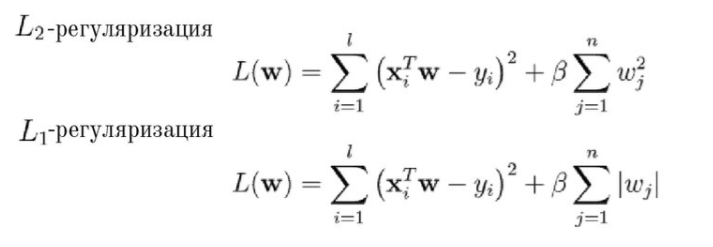

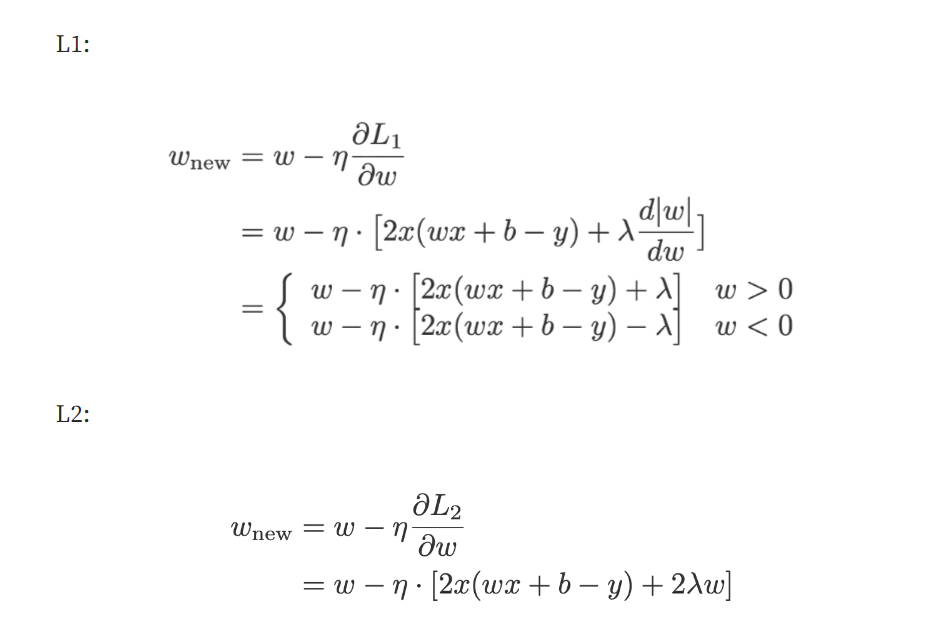

## Пункт 4

Предобработка данных:


*   Заполнение пропусков (чаще всего средним значением или медианой)
*   Кодировка (OneHotEncoder, LabelEncoder, BinaryEncoder, HelmetEncoder, Backward-Difference Encoder, TargetEncoding ...)
*   Масштабирование признаков (StandardDcaler, MinMaxScaler)
*   Добавление признаков (полиномиальные признаки, взятие логарифма, квадратного корня, применение тригонометрических функий)
*   Удаление выбросов/шума



## Пункт 5

Имплементация линейной регрессии с помощью NumPy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class MyLinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000, penalty = None, lyambda = 0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.penalty = penalty
        self.lyambda = lyambda
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            self.losses.append(self.__loss(y, y_pred))

            if self.penalty == None:
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            if self.penalty == 'l2':
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y)) + 2 * self.lyambda * self.weights
            if self.penalty == 'l1':
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y)) + 2 * np.array([self.lyambda if i >= 0 else -self.lyambda for i in self.weights])

            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
            y_pred = np.dot(X, self.weights) + self.bias
            return y_pred
    
    def get_weights(self):
            return self.weights
    
    def __loss(self, y, p):
            if self.penalty == None:
              return np.sum((p-y)**2)
            if self.penalty == 'l1':
              return np.sum((p-y)**2) + self.lyambda*abs(self.weights)
            if self.penalty == 'l2':
              return np.sum((p-y)**2) + self.lyambda*(self.weights)**2
    
    def get_losses(self):
          return self.losses

Загрузим обычный датасет для задач регрессии

In [3]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/tcvwgixnh9ixecd/car_price_pred.csv?dl=0'

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Предобработаем данные по-простому

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
train.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
y = train['price']
X = train.drop(columns=['price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


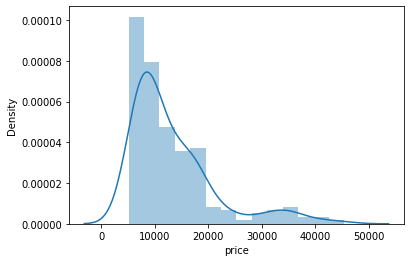

In [9]:
sns.distplot(y)

In [10]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

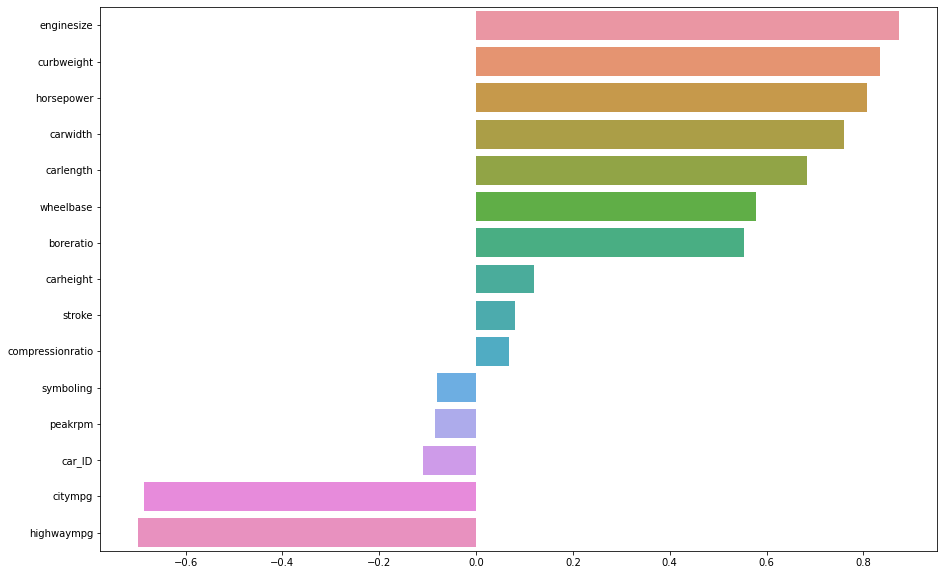

In [11]:
correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [12]:
categ_data = X.select_dtypes([np.object0])
cat_features = categ_data.columns

In [13]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
X = pd.concat([X[numeric_features], pd.get_dummies(X[cat_features], drop_first=True)], axis=1) #

In [14]:
pca = StandardScaler()
X[numeric_features] = pca.fit_transform(X[numeric_features])

## Пункты 6-8

Имплементации линейной регрессии содержатся в:


*   numpy polyfit
*   SciPy linregress
*   OLS and ols of statsmodels
*   sklearn



NumPy polyfit

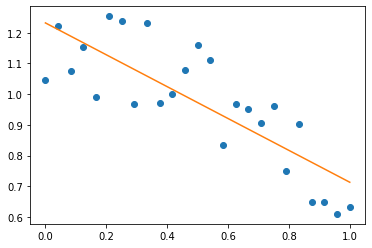

In [15]:
np.random.seed(12)
x1 = np.linspace( 0, 1, 25 )
y1 = np.cos(x1) + 0.3*np.random.rand(25)
p = np.poly1d( np.polyfit(x1, y1, 1) )
t = np.linspace(0, 1, 250)
plt.plot(x1, y1, 'o', t, p(t), '-')
plt.show()

SciPy linregress

In [16]:
import scipy as sp
regr_results = sp.stats.linregress(x1, y1)
print(regr_results)

LinregressResult(slope=-0.5192984296358545, intercept=1.2322656317826235, rvalue=-0.8087530381726007, pvalue=9.953146454085446e-07, stderr=0.07874519725637359, intercept_stderr=0.04593469839955126)


OLS and ols of statsmodels

In [17]:
X1 = X.copy()
y1 = y.copy()

In [18]:
import time

In [19]:
import statsmodels.api as sm
X1 = sm.add_constant(X1)
lin_model = sm.OLS(y1, X1)
start = time.time()
regr_results = lin_model.fit()
stop = time.time()
regr_results.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     60.35
Date:                Mon, 09 Jan 2023   Prob (F-statistic):           6.35e-19
Time:                        16:30:55   Log-Likelihood:                -1514.8
No. Observations:                 205   AIC:                             3388.
Df Residuals:                      26   BIC:                             3982.
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    1.865e+04   3287.805      5.674      0.000    1.19e+04    2.54e+04
car_ID                                   9058.6722   3827.834      2.367      0.026    1190.446    1.69e+04
symboling                                 901.4722    402.108      2.242      0.034      74.926    1728.018
wheelbase                                1740.9588    771.979      2.255      0.033     154.134    3327.784
carlength                               -2756.3494    929.452     -2.966      0.006   -4666.865    -845.834
carwidth                                 1514.8378    656.364      2.308      0.029     165.662    2864.014
carheight                               -1125.7465    663.639     -1.696      0.102   -2489.875     238.382
curbweight                               5634.1991   1763.602      3.195      0.004    2009.063    9259.335
enginesize                               2306.8575   2095.493      1.101      0.281   -2000.489    6614.204
boreratio                                -941.4788    484.351     -1.944      0.063   -1937.077      54.119
stroke                                   -411.2658    335.616     -1.225      0.231   -1101.134     278.603
compressionratio                        -7568.9036   3060.606     -2.473      0.020   -1.39e+04   -1277.737
horsepower                              -1691.3718   1341.622     -1.261      0.219   -4449.115    1066.372
peakrpm                                  1563.3208    479.466      3.261      0.003     577.764    2548.878
citympg                                  2018.5272   1456.709      1.386      0.178    -975.780    5012.835
highwaympg                               -853.3331   1127.072     -0.757      0.456   -3170.063    1463.397
CarName_alfa-romero Quadrifoglio         1.875e+04   6772.509      2.769      0.010    4831.972    3.27e+04
CarName_alfa-romero giulia               1.298e+04   6821.251      1.903      0.068   -1041.701     2.7e+04
CarName_alfa-romero stelvio              1.583e+04   6759.831      2.342      0.027    1936.473    2.97e+04
CarName_audi 100 ls                      1.739e+04   6377.698      2.727      0.011    4284.271    3.05e+04
CarName_audi 100ls                       3919.2085   3366.622      1.164      0.255   -3000.981    1.08e+04
CarName_audi 4000                        7931.6576   3246.909      2.443      0.022    1257.540    1.46e+04
CarName_audi 5000                        5793.9191   3192.282      1.815      0.081    -767.911    1.24e+04
CarName_audi 5000s (diesel)              3526.9774   3305.674      1.067      0.296   -3267.932    1.03e+04
CarName_audi fox                         6482.8278   3180.054      2.039      0.052     -53.866     1.3e+04
CarName_bmw 320i                         1.708e+04   6228.1

In [20]:
print(f"Training time: {stop - start}s")

Training time: 0.05587506294250488s


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Ridge

In [24]:
model1 = Ridge(alpha = 0.6)

In [25]:
start = time.time()
model1.fit(X_train, y_train)
stop = time.time()
y_pred1 = model1.predict(X_test)
y_train_pred1 = model1.predict(X_train)

In [26]:
print(f"Training time: {stop - start}s")

Training time: 0.04373431205749512s


In [27]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred1))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred1))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred1))
print("Test R2 = %.4f" % r2_score(y_test, y_pred1))

Train MSE = 831708.3506
Test MSE = 10010407.9018
Train R2 = 0.9864
Test R2 = 0.8555


### Lasso

In [28]:
model2 = Lasso(alpha = 30, tol = 0.005)

In [29]:
start = time.time()
model2.fit(X_train, y_train)
stop = time.time()
y_pred2 = model2.predict(X_test)
y_train_pred2 = model2.predict(X_train)

In [30]:
print(f"Training time: {stop - start}s")

Training time: 0.030536174774169922s


In [31]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred2))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred2))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred2))
print("Test R2 = %.4f" % r2_score(y_test, y_pred2))

Train MSE = 3280520.5799
Test MSE = 10922837.5687
Train R2 = 0.9462
Test R2 = 0.8423


### Linear Regression

In [32]:
model3 = LinearRegression()

In [33]:
start = time.time()
model3.fit(X_train, y_train)
stop = time.time()
y_pred3 = model2.predict(X_test)
y_train_pred3 = model2.predict(X_train)

In [34]:
print(f"Training time: {stop - start}s")

Training time: 0.02313971519470215s


In [35]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred3))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred3))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred3))
print("Test R2 = %.4f" % r2_score(y_test, y_pred3))

Train MSE = 3280520.5799
Test MSE = 10922837.5687
Train R2 = 0.9462
Test R2 = 0.8423


### MyLinearRegression

In [36]:
model4 = MyLinearRegression(lr=0.015)

In [37]:
start = time.time()
model4.fit(X_train, y_train)
stop = time.time()
y_pred4 = model4.predict(X_test)
y_train_pred4 = model4.predict(X_train)

In [38]:
print(f"Training time: {stop - start}s")

Training time: 9.817701816558838s


In [39]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred4))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred4))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred4))
print("Test R2 = %.4f" % r2_score(y_test, y_pred4))

Train MSE = 4209124.1380
Test MSE = 11601473.2683
Train R2 = 0.9309
Test R2 = 0.8326


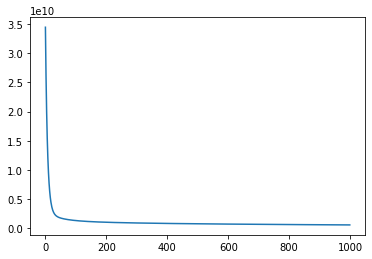

In [40]:
losses = model4.get_losses()
plt.plot(losses)
plt.show()

### MyLinearRegression + L1

In [41]:
model5 = MyLinearRegression(lr=0.03, penalty='l1')

In [42]:
start = time.time()
model5.fit(X_train, y_train)
stop = time.time()
y_pred5 = model5.predict(X_test)
y_train_pred5 = model5.predict(X_train)

In [43]:
print(f"Training time: {stop - start}s")

Training time: 9.70265531539917s


In [44]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred5))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred5))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred5))
print("Test R2 = %.4f" % r2_score(y_test, y_pred5))

Train MSE = 2944048.5854
Test MSE = 11173075.2125
Train R2 = 0.9517
Test R2 = 0.8387


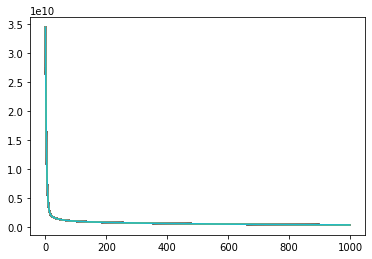

In [45]:
losses = model5.get_losses()
plt.plot(losses)
plt.show()

### MyLinearRegression + L2

In [46]:
model6 = MyLinearRegression(lr=0.05, penalty='l2', lyambda=0.01)

In [47]:
start = time.time()
model6.fit(X_train, y_train)
stop = time.time()
y_pred6 = model6.predict(X_test)
y_train_pred6 = model6.predict(X_train)

In [48]:
print(f"Training time: {stop - start}s")

Training time: 10.065067529678345s


In [49]:
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred6))
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred6))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred6))
print("Test R2 = %.4f" % r2_score(y_test, y_pred6))

Train MSE = 2936958.2486
Test MSE = 11078274.5469
Train R2 = 0.9518
Test R2 = 0.8401


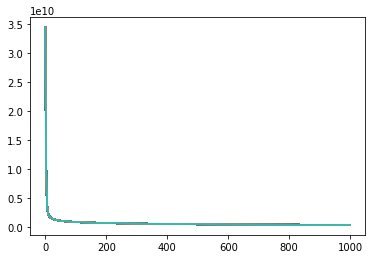

In [50]:
losses = model6.get_losses()
plt.plot(losses)
plt.show()

### Итог: наша имплементация показывает результаты, идентичные результатам имплементаций в sklearn 

## Пункт 9

При отборе признаков и оценки их важности в основном используются статистические методы.
 
Самое очевидное удаление – признак, у которого значение неизменно, так как низковариативные признаки скорее хуже, чем высоковариативные. Так можно придти к идее отсекать признаки, дисперсия которых ниже определенной границы.

Есть FeatureSelector, который отбирает признаки с помощью 5 методов:



*   Пропущенные значения(метод осуществляет отбор признаков по очень простому алгоритму: подсчет количества пропущенных значений. Если оно превышает заданный порог, параметр рекомендуется удалить)
*   Коллинеарные признаки (признаки, которые сильно коррелируют друг с другом приводят к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели, метод находит коллинеарные предикторы на основе заданного значения коэффициента корреляции, для каждой пары коррелированных признаков он определяет один для удаления)
*   Признаки с нулевой важностью (находит признаки, которые имеют нулевую важность; например, в моделях на основе деревьев решений такие параметры не используются, поэтому мы можем смело удалить их, не влияя на производительность)
*   Признаки с низкой важностью (находит параметры с наименьшей значимостью, которые не влияют на указанный общий уровень; например,  признаки, которые не вносят вклад в 99% общего значения)
*   5-й метод описали в самом начале (единственные значения)

Есть также feature engineering - процесс, во время которого мы извлекаем новые переменные для таблицы из необработанных данных.

Часто с помощью обученной модели можно оценить признаки. Например, линейная модель с Lasso регуляризацией, склонной обнулять веса слабых признаков. Если признаки явно бесполезны в простой модели, то не надо тянуть их и в более сложную.



In [51]:
myweights4 = model4.get_weights()
myweights5 = model5.get_weights()
myweights6 = model6.get_weights()

weights1 = model1.coef_
weights2 = model2.coef_
weights3 = model3.coef_

In [52]:
df4 = pd.DataFrame({'weights_for_my_lr' : myweights4})
df5 = pd.DataFrame({'weights_for_my_lr+l1' : myweights5})
df6 = pd.DataFrame({'weights_for_my_lr+l2' : myweights6})

df1 = pd.DataFrame({'weights_for_sklearn_lr+l2' : weights1})
df2 = pd.DataFrame({'weights_for_sklearn_lr+l1' : weights2})
df3 = pd.DataFrame({'weights_for_sklearn_lr' : weights3})

In [53]:
null_weights = pd.concat([df3[df3['weights_for_sklearn_lr'] == 0], df2[df2['weights_for_sklearn_lr+l1'] == 0], df1[df1['weights_for_sklearn_lr+l2'] == 0], 
                         df4[df4['weights_for_my_lr'] == 0], df5[df5['weights_for_my_lr+l1'] == 0], df6[df6['weights_for_my_lr+l2'] == 0]], axis = 1)

In [54]:
null_weights

,weights_for_sklearn_lr,weights_for_sklearn_lr+l1,weights_for_sklearn_lr+l2,weights_for_my_lr,weights_for_my_lr+l1,weights_for_my_lr+l2
8,NaN,-0.0,NaN,NaN,NaN,NaN
13,NaN,-0.0,NaN,NaN,NaN,NaN
14,NaN,-0.0,NaN,NaN,NaN,NaN
15,NaN,0.0,NaN,NaN,NaN,NaN
16,NaN,-0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184,NaN,0.0,NaN,NaN,NaN,NaN
185,NaN,0.0,NaN,NaN,NaN,NaN
186,0.0,0.0,0.0,0.0,0.0,0.0
188,NaN,-0.0,NaN,NaN,NaN,NaN


Мы получили таблицу занулившихся весов. Сравним занулившиеся веса для наших имплементаций и sklearn

In [55]:
(null_weights['weights_for_sklearn_lr'] == null_weights['weights_for_my_lr']).value_counts()

False    148
True      10
dtype: int64

In [56]:
(null_weights['weights_for_sklearn_lr+l1'] == null_weights['weights_for_my_lr+l1']).value_counts()

False    119
True      39
dtype: int64

In [57]:
(null_weights['weights_for_sklearn_lr+l2'] == null_weights['weights_for_my_lr+l2']).value_counts()

False    119
True      39
dtype: int64

Посмотрим на большие веса

In [58]:
big_weights = pd.concat([df3[df3['weights_for_sklearn_lr'] >= 2000], df2[df2['weights_for_sklearn_lr+l1'] >= 2000], df1[df1['weights_for_sklearn_lr+l2'] >= 2000], 
                         df4[df4['weights_for_my_lr'] >= 2000], df5[df5['weights_for_my_lr+l1'] >= 2000], df6[df6['weights_for_my_lr+l2'] >= 2000]], axis = 1)

In [59]:
big_weights

,weights_for_sklearn_lr,weights_for_sklearn_lr+l1,weights_for_sklearn_lr+l2,weights_for_my_lr,weights_for_my_lr+l1,weights_for_my_lr+l2
0,16559.062233,NaN,NaN,NaN,NaN,NaN
6,6148.329775,2825.977617,2482.721482,NaN,2328.283385,2111.725016
7,NaN,2991.204752,3887.098969,3291.017503,3572.012325,3397.584603
13,2788.482705,NaN,NaN,NaN,NaN,NaN
15,27904.204770,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
181,2543.822465,NaN,NaN,NaN,NaN,NaN
182,3410.070391,NaN,NaN,NaN,NaN,NaN
183,2816.093200,NaN,NaN,NaN,NaN,NaN
185,2551.692845,NaN,NaN,NaN,NaN,NaN


#**Логистическая регрессия**

## Пункты 1-2

Начнём с обычной линейной классификации (в случае ниже бинарная классификация):

$X \in R^{i*j}; y \in \left\{0,1 \right\}^i$

$X =                                          
 \begin{pmatrix}
  x_{11} & x_{12} & \cdots & x_{1j} \\
  x_{21} & x_{22} & \cdots & x_{2j} \\                 
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{i1} & x_{i2} & \cdots & x_{ij} 
 \end{pmatrix}$

$y = 
 \begin{pmatrix}
  y_{1} \\
  y_{2} \\
  \vdots \\
  y_{i} 
 \end{pmatrix}$

Вероятностная модель

$P = (Y = 1 \mid X = (x_1, x_2, ... x_i))$ - какова вероятность, что Y = 1 при условии, что Х равен данному вектору. Если бы у нас было много классов, то на каждый класс приходилась бы такая вероятностная модель


Функция правдоподобия

$X$ - вектор признаков, $\hat{y}$ - наша модель

$P(Y = 1 \mid X) = \hat{y}$

$=>$ правдоподобие $∏_{i=1}^n P(Y = y_i \mid x_i)$ - общая вероятность по всей выборке

Обучение через максимальное правдоподобие:

$∏_{i=1}^n \hat{y}_i^{y_i}*(1-\hat{y}_i)^{1-y_i} → max$ для $y ∈ \left\{0,1 \right\}$; максимизировать произведение тяжело, поэтому используется логарифм произвдения

$∑_{i=1}^n y_i*ln(\hat{y}_i) + (1-y_i)*ln(1-\hat{y}_i) → max$

Из верхнего выражения можно перейти к минимизации:

-$∑_{i=1}^n y_i*ln(\hat{y}_i) + (1-y_i)*ln(1-\hat{y}_i) → min$

Перейдем к модели логистической регрессии

$X = (1, x_1, x_2, ... x_n)$

$\hat{y}_i = σ(∑_{i=0}^n w*x_i)$

где $σ(z) = \frac{1}{1+e^{-z}}$

Пример графика
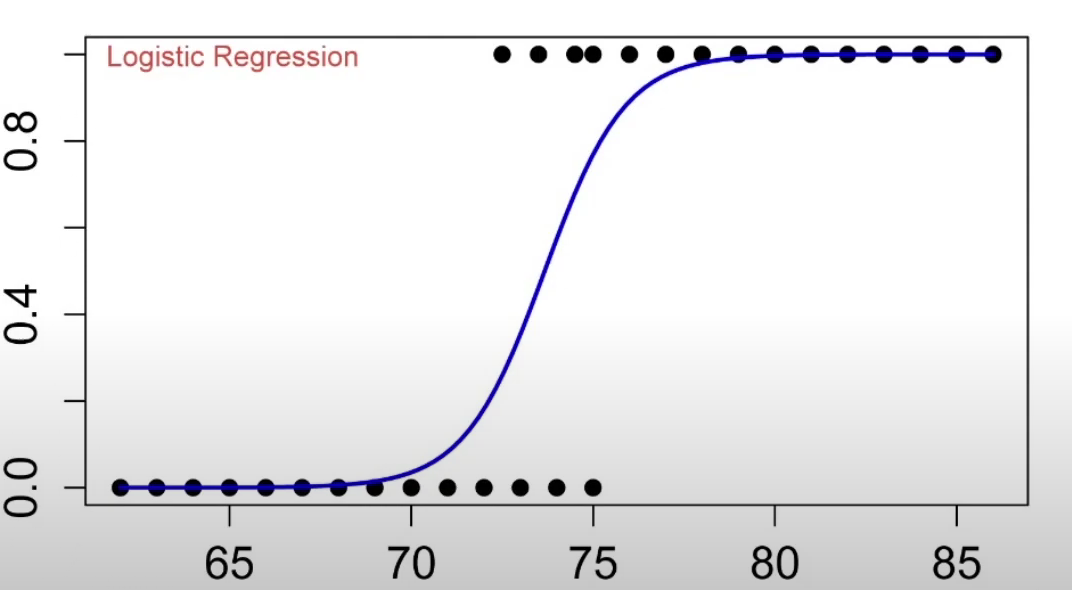

Тогда подставим в функцию потерь наше предсказание (с сигмоидой)

$L(w) = - \sum_{i=1}^n y_i * ln(\frac{1}{1+e^{-\Large\langle w, x_i⟩}}) + (1-y_i)*ln(\frac{e^{-\Large\langle w, x_i⟩}}{1+e^{-\Large\langle w, x_i⟩}}) → min$ - функция потерь для логистической регрессии - LogLoss

Преобразуем её:

$L(w) = - \sum_{i=1}^n y_i * ln(\frac{1}{1+e^{-\Large\langle w, x_i⟩}}) + (1-y_i)*ln(\frac{1}{1+e^{\Large\langle w, x_i⟩}})$

$L(w) = - \sum_{i=1}^n y_i * ln(\frac{1}{1+e^{-\Large\langle w, x_i⟩}}) + (1-y_i)*ln(\frac{1}{1+e^{\Large\langle w, x_i⟩}})$

1. $-y_i * ln(\frac{1}{1+e^{-\Large\langle w, x_i⟩}}) = -y_i * ln(\frac{e^{\Large\langle w, x_i⟩}}{1+e^{\Large\langle w, x_i⟩}}) = -y_i * (ln(e^{\Large\langle w, x_i⟩}) - ln(1+e^{\Large\langle w, x_i⟩}) = -y_i*⟨w, x_i⟩ + y_i*ln(1+e^{\Large\langle w, x_i⟩})$

2. $-(1-y_i)*ln(\frac{1}{1+e^{\Large\langle w, x_i⟩}}) = (1-y_i)*ln(1+e^{\Large\langle w, x_i⟩})$

3. $L(w) = \sum_{i=1}^n ln(1+e^{-y_i*⟨w_i, x⟩})$

Если у нас много классов, то применяются следующие методы:
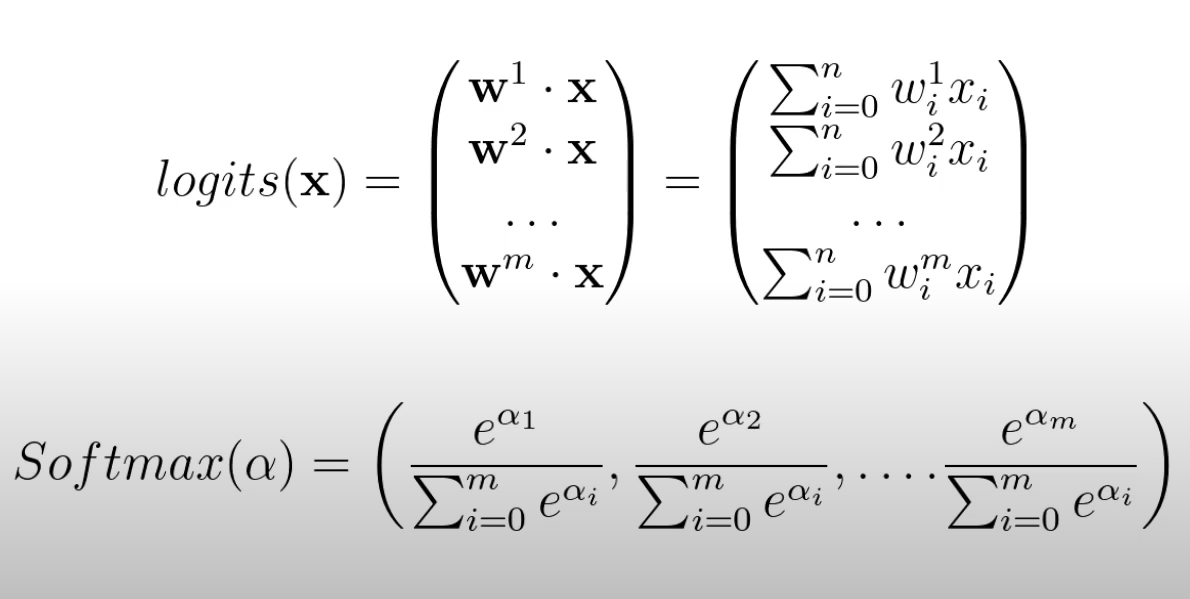

В logits хранятся веса для каждого класса и полученные значения, а затем к ним применяется функция softmax, где будет получена вероятность принадлежности к каждому классу

Пример:
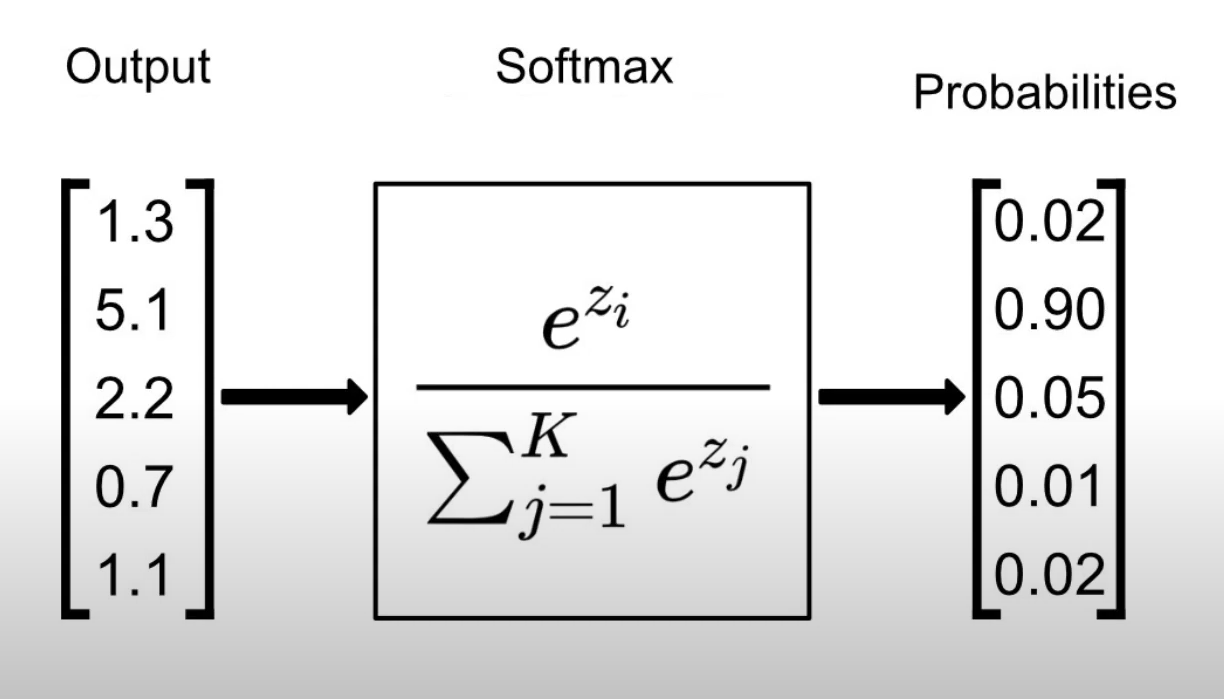

Предсказанная вероятность для k-го класса имеет следующий вид:

$P(Y = k \mid X) = \hat{y}_k = \huge\frac{e^{\sum_{i=0}^n w_i^k * x_i}}{\sum_{k=1}^m e^{\sum_{i=0}^n w_i^k * x_i}}$

## Пункт 3

LogLoss + L1 = $-\sum_{i=1}^n y_i * ln(\hat{y}_i) + (1-y_i)*ln(1-\hat{y}_i) + λ\mid\mid w \mid\mid_1^2$

LogLoss + L2 = $-\sum_{i=1}^n y_i * ln(\hat{y}_i) + (1-y_i)*ln(1-\hat{y}_i) + λ\mid\mid w \mid\mid_2^2$

## Пункт 4

Загрузим датасет и предобработаем данные

In [60]:
!wget -O "train.csv" -q "https://www.dropbox.com/s/5bz5a968eeryroj/churn_prediction.csv?dl=0"

In [61]:
train = pd.read_csv('train.csv')

In [62]:
train.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
226,16,98.75,1587.55,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4077,18,71.10,1247.75,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
478,70,66.00,4891.5,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Electronic check,0


In [63]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [64]:
y = train['Churn']
X = train.drop(columns='Churn')

In [65]:
X.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
dtype: object

In [66]:
X['TotalSpent'] = pd.to_numeric(X['TotalSpent'], errors ='coerce')

In [67]:
X.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [68]:
X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)

In [69]:
num_data = X.select_dtypes([np.number])
num_features = num_data.columns
cat_data = X.select_dtypes([np.object0])
cat_features = cat_data.columns

In [70]:
for i in cat_features:
  print(X[i].value_counts())
  print('-------------------------------------')

Male      2655
Female    2627
Name: Sex, dtype: int64
-------------------------------------
No     2705
Yes    2577
Name: HasPartner, dtype: int64
-------------------------------------
No     3676
Yes    1606
Name: HasChild, dtype: int64
-------------------------------------
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
-------------------------------------
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
-------------------------------------
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
-------------------------------------
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
-------------------------------------
No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64
-------------------------------------
No     

In [71]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features], drop_first=True)], axis=1)
X.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4858,1,29.90,29.90,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3039,1,49.65,49.65,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2921,1,54.50,54.50,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
scal = StandardScaler()
X[num_features] = scal.fit_transform(X[num_features])

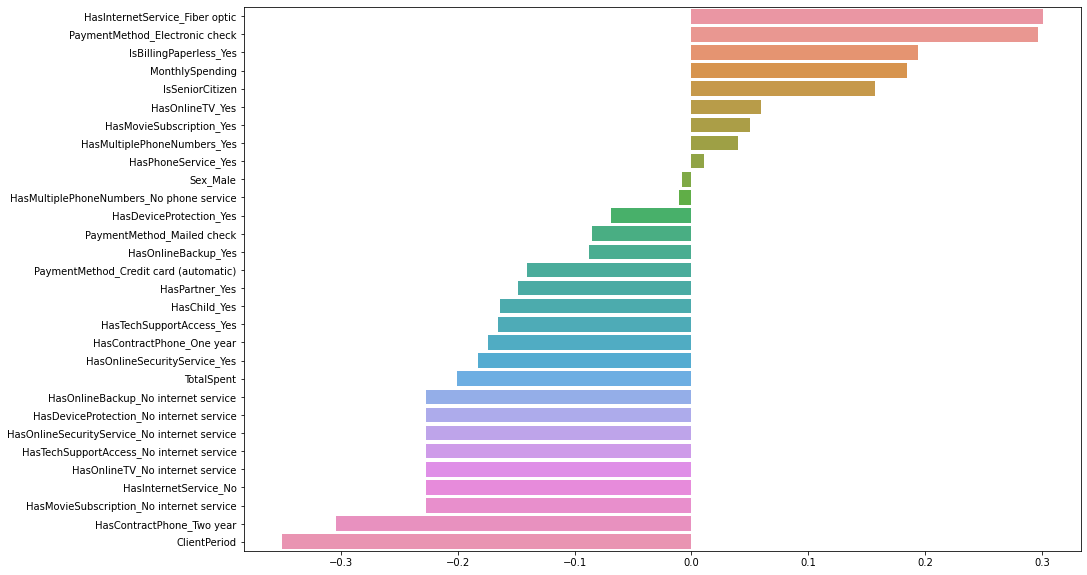

In [74]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Для совсем простой обработки хватит. Для логистической регрессии всегда нужно кодировать категориальные признаки, поскольку она тоже работает только с числовыми признаками. В целом обычно используются все те же методы, что и в линейной регрессии:


*   Заполнение пропусков (чаще всего средним значением или медианой)
*   Кодировка (OneHotEncoder, LabelEncoder, BinaryEncoder, HelmetEncoder, Backward-Difference Encoder, TargetEncoding ...)
*   Масштабирование признаков (StandardDcaler, MinMaxScaler)
*   Добавление признаков (полиномиальные признаки, взятие логарифма, квадратного корня, применение тригонометрических функий)
*   Удаление выбросов/шума



## Пункт 5

**Градиентный спуск**

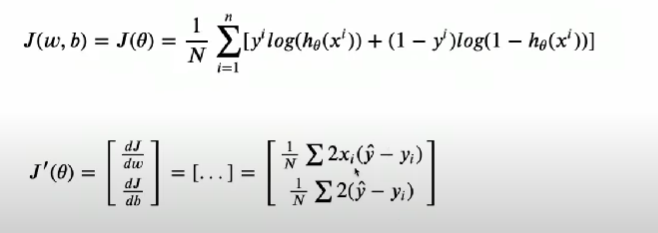

Вернёмся к нашей функции потерь


-$∑_{i=1}^n y_i*ln(\hat{y}_i) + (1-y_i)*ln(1-\hat{y}_i) → min$

Пусть $A = -y_i*ln(\hat{y}_i)$ и $B = -(1-y_i)*ln(1-\hat{y}_i)$

Продиффиринцируем:

$\large\frac{\partial A}{\partial w} = \frac{-y_i}{\hat{y}_i}*\frac{\partial \hat{y}_i}{\partial z}*\frac{\partial z}{\partial w} = \frac{-y_i}{\hat{y}_i} * \hat{y}_i *(1-\hat{y}_i)*x = -y_i*x*(1-\hat{y}_i)$

$\large\frac{\partial B}{\partial w} = \frac{(1-y_i)}{(1-\hat{y}_i)}*\frac{\partial \hat{y}_i}{\partial z}*\frac{\partial z}{\partial w} = \frac{(1-y_i)}{(1-\hat{y}_i)} * \hat{y}_i *(1-\hat{y}_i)*x = \hat{y}_i*x*(1-{y}_i)$

$A + B = \hat{y}_i*x*(1-{y}_i) - y_i*x*(1-\hat{y}_i) = x*(\hat{y}_i-y_i)$ - наш итоговый градиент

In [75]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class MyLogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000, penalty = None, lyambda = 0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = None
        self.penalty = penalty
        self.lyambda = lyambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        lossss = []
        for _ in range(self.n_iters):
            y_linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(y_linear_pred)
            curr = self.__loss(y, y_pred)
            lossss.append(curr)

            if self.penalty == None:
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            if self.penalty == 'l2':
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y)) + 2 * self.lyambda * self.weights
            if self.penalty == 'l1':
              dw = (1/n_samples) * np.dot(X.T, (y_pred-y)) + 2 * np.array([self.lyambda if i >= 0 else -self.lyambda for i in self.weights])

            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
        self.losses = lossss

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
        
    def predict_proba(self, X):
        y_linear_pred = np.dot(X, self.weights) + self.bias
        return sigmoid(y_linear_pred)

    def get_weights(self):
        return self.weights
    
    def __loss(self, y, p):
        if self.penalty == None:
          return -np.sum((y * np.log(p) + (1 - y) * np.log(1 - p)))
        if self.penalty == 'l1':
          return -np.sum((y * np.log(p) + (1 - y) * np.log(1 - p))) + self.lyambda*abs(self.weights)
        if self.penalty == 'l2':
          return -np.sum((y * np.log(p) + (1 - y) * np.log(1 - p))) + self.lyambda*(self.weights**2)

    def get_losses(self):
        return self.losses 

In [76]:
def true_positive(real, prediction):
    tp = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 1:
            tp +=1
    return tp

def true_negative(real, prediction):
    tn = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 0:
            tn +=1
    return tn

def false_positive(real, prediction):
    fp = 0
    for re, pred in zip(real, prediction):
        if re == 0 and pred == 1:
            fp +=1
    return fp

def false_negative(real, prediction):
    fn = 0
    for re, pred in zip(real, prediction):
        if re == 1 and pred == 0:
            fn +=1
    return fn

In [77]:
def accuracy(real, prediction):
    tp = true_positive(real, prediction)  
    fp = false_positive(real, prediction)  
    fn = false_negative(real, prediction)  
    tn = true_negative(real, prediction)  
    acc_score = (tp + tn)/ (tp + tn + fp + fn)
    return acc_score

In [78]:
def precision(real, prediction):
    tp = true_positive(real, prediction)  
    fp = false_positive(real, prediction)  
    prec = tp/ (tp + fp)  
    return prec

In [79]:
def recall(real, prediction):
    tp = true_positive(real, prediction)  
    fn = false_negative(real, prediction)  
    prec = tp/ (tp + fn)  
    return prec

In [80]:
def f1(real, prediction):
    p = precision(real, prediction)
    r = recall(real, prediction)
    f1_score = 2 * p * r/ (p + r) 
    return f1_score

## Пункты 6-8

In [81]:
import statsmodels.formula.api as smf
X1 = X.copy()
y1 = y.copy()
X1['Churn'] = y1

In [82]:
X1.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen',
       'Sex_Male', 'HasPartner_Yes', 'HasChild_Yes', 'HasPhoneService_Yes',
       'HasMultiplePhoneNumbers_No phone service',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_Fiber optic',
       'HasInternetService_No', 'HasOnlineSecurityService_No internet service',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No internet service',
       'HasOnlineBackup_Yes', 'HasDeviceProtection_No internet service',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No internet service',
       'HasTechSupportAccess_Yes', 'HasOnlineTV_No internet service',
       'HasOnlineTV_Yes', 'HasMovieSubscription_No internet service',
       'HasMovieSubscription_Yes', 'HasContractPhone_One year',
       'HasContractPhone_Two year', 'IsBillingPaperless_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='ob

In [83]:
import time

In [84]:
start = time.time()

log_regr = smf.logit('Churn ~ ClientPeriod + MonthlySpending + TotalSpent + IsSeniorCitizen + Sex_Male + HasPartner_Yes + HasChild_Yes + HasPhoneService_Yes + HasMultiplePhoneNumbers_Yes + HasOnlineTV_Yes + HasMovieSubscription_Yes + IsBillingPaperless_Yes', data=X1).fit()

stop = time.time()
log_regr.summary()

Optimization terminated successfully.
         Current function value: 0.436435
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5269
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Jan 2023   Pseudo R-squ.:                  0.2412
Time:                        16:31:34   Log-Likelihood:                -2305.3
converged:                       True   LL-Null:                       -3038.0
Covariance Type:            nonrobust   LLR p-value:                1.046e-306
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0255      0.174     -5.909      0.000      -1.366      -0.685
ClientPeriod                   -1.6658      0.156    -10.691      0.000      -1.971      -1.360
MonthlySpending                 0.8288      0.080     10.309      0.000       0.671       0.986
TotalSpent                      0.3338      0.163      2.050      0.040       0.015       0.653
IsSeniorCitizen                 0.1906      0.035      5.462      0.000       0.122       0.259
Sex_Male                        0.0022      0.073      0.031      0.976      -0.141       0.145
HasPartner_Yes                  0.0117      0.086      0.136      0.892      -0.157       0.181
HasChild_Yes                   -0.3381      0.099     -3.419      0.001      -0.532      -0.144
HasPhoneService_Yes            -0.9589      0.143     -6.726      0.000      -1.238      -0.679
HasMultiplePhoneNumbers_Yes     0.3283      0.091      3.621      0.000       0.151       0.506
HasOnlineTV_Yes                -0.1124      0.097     -1.154      0.248      -0.303       0.078
HasMovieSubscription_Yes       -0.0943      0.097     -0.971      0.332      -0.285       0.096
IsBillingPaperless_Yes          0.5961      0.083      7.205      0.000       0.434       0.758
===============================================================================================
"""

In [85]:
print(f"Training time: {stop - start}s")

Training time: 0.12435245513916016s


Тяжело работает с данными. Нужно вручную вводить названия столбцов, что неудобно на больших данных

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [88]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### LogisticRegression

In [89]:
model1 = LogisticRegression(penalty='none')

In [90]:
start = time.time()
model1.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model1.predict_proba(X_test)[::,1]
y_train_pred = model1.predict_proba(X_train)[::,1]

In [91]:
print(f"Training time: {stop - start}s")

Training time: 0.28290629386901855s


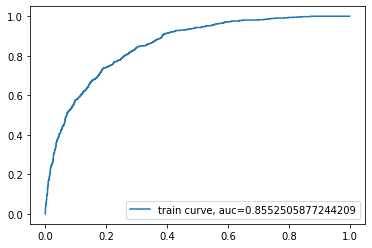

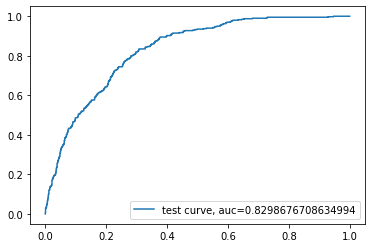

In [92]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [93]:
train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)

In [94]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6234194612424409
f1_test =  0.5520974289580515
my_f1_train =  0.6234194612424409
my_f1_test =  0.5520974289580515
recall_train =  0.5756345177664974
recall_test =  0.5112781954887218
my_recall_train =  0.5756345177664974
my_recall_test =  0.5112781954887218
precision_train =  0.6798561151079137
precision_test =  0.6
my_precision_train =  0.6798561151079137
my_precision_test =  0.6
accuracy_train =  0.8147146334866108
accuracy_test =  0.7911671924290221
my_accuracy_train =  0.8147146334866108
my_accuracy_test =  0.7911671924290221


### LogisticRegression + L1

In [95]:
model2 = LogisticRegression(penalty='l1', solver = 'liblinear')

In [96]:
start = time.time()
model2.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model2.predict_proba(X_test)[::,1]
y_train_pred = model2.predict_proba(X_train)[::,1]

In [97]:
print(f"Training time: {stop - start}s")

Training time: 0.1634817123413086s


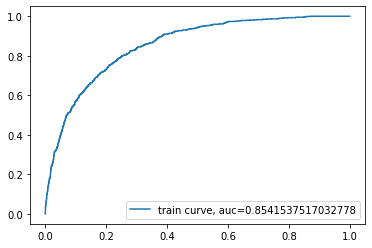

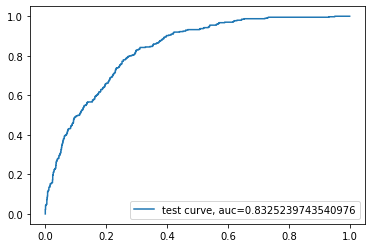

In [98]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [99]:
train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)

In [100]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6177606177606179
f1_test =  0.5513513513513513
my_f1_train =  0.6177606177606179
my_f1_test =  0.5513513513513513
recall_train =  0.5685279187817259
recall_test =  0.5112781954887218
my_recall_train =  0.5685279187817259
my_recall_test =  0.5112781954887218
precision_train =  0.6763285024154589
precision_test =  0.5982404692082112
my_precision_train =  0.6763285024154589
my_precision_test =  0.5982404692082112
accuracy_train =  0.8125507167974033
accuracy_test =  0.7905362776025237
my_accuracy_train =  0.8125507167974033
my_accuracy_test =  0.7905362776025237


### LogisticRegression + L2

In [101]:
model3 = LogisticRegression(penalty='l2')

In [102]:
start = time.time()
model3.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model3.predict_proba(X_test)[::,1]
y_train_pred = model3.predict_proba(X_train)[::,1]

In [103]:
print(f"Training time: {stop - start}s")

Training time: 0.1134030818939209s


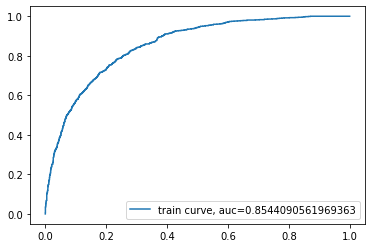

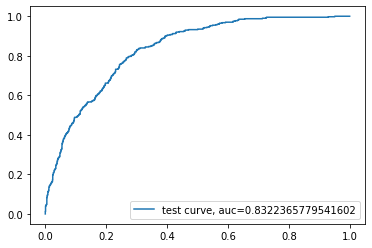

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [105]:
train_pred = model3.predict(X_train)
test_pred = model3.predict(X_test)

In [106]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.61742006615215
f1_test =  0.5481682496607869
my_f1_train =  0.61742006615215
my_f1_test =  0.5481682496607869
recall_train =  0.5685279187817259
recall_test =  0.506265664160401
my_recall_train =  0.5685279187817259
my_recall_test =  0.506265664160401
precision_train =  0.6755126658624849
precision_test =  0.5976331360946746
my_precision_train =  0.6755126658624849
my_precision_test =  0.5976331360946746
accuracy_train =  0.8122802272112524
accuracy_test =  0.7899053627760252
my_accuracy_train =  0.8122802272112524
my_accuracy_test =  0.7899053627760252


### MyLogisticRegression

In [107]:
model4 = MyLogisticRegression(lr = 5, n_iters=100)

In [108]:
start = time.time()
model4.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model4.predict_proba(X_test)
y_train_pred = model4.predict_proba(X_train)

In [109]:
print(f"Training time: {stop - start}s")

Training time: 0.3583369255065918s


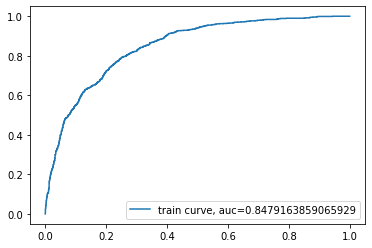

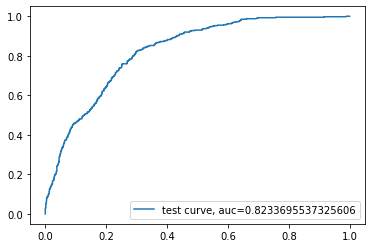

In [110]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [111]:
#заметим различия в построении графиков roc-кривых, если будет получать ответы из 0 и 1, а не вероятностей
y_preds = model4.predict(X_test)
y_train_preds = model4.predict(X_train)

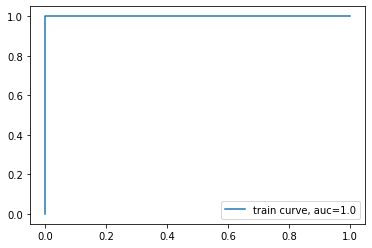

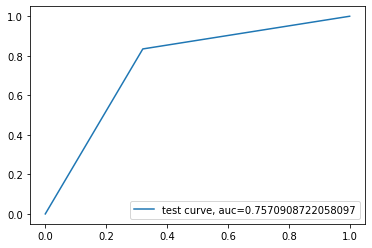

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train)
auc = metrics.roc_auc_score(y_train,  y_train)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_preds)
auc = metrics.roc_auc_score(y_test, y_preds)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [113]:
train_pred = model4.predict(X_train, threshold=0.7)
test_pred = model4.predict(X_test, threshold=0.7)

In [114]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6377816291161179
f1_test =  0.5952626158599381
my_f1_train =  0.6377816291161179
my_f1_test =  0.5952626158599381
recall_train =  0.7472081218274111
recall_test =  0.7243107769423559
my_recall_train =  0.7472081218274111
my_recall_test =  0.7243107769423559
precision_train =  0.5563114134542706
precision_test =  0.5052447552447552
my_precision_train =  0.5563114134542706
my_precision_test =  0.5052447552447552
accuracy_train =  0.7738707059778198
accuracy_test =  0.7520504731861198
my_accuracy_train =  0.7738707059778198
my_accuracy_test =  0.7520504731861198


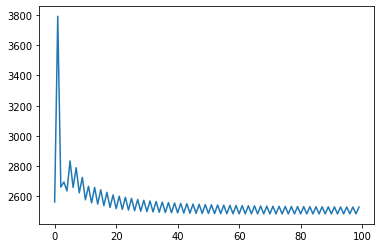

In [115]:
losses = model4.get_losses()
plt.plot(losses)
plt.show()

### MyLogisticRegression + L1

In [116]:
model5 = MyLogisticRegression(lr = 0.15, n_iters=1000, penalty='l1', lyambda = 0.001)

In [117]:
start = time.time()
model5.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model5.predict_proba(X_test)
y_train_pred = model5.predict_proba(X_train)

In [118]:
print(f"Training time: {stop - start}s")

Training time: 3.419809579849243s


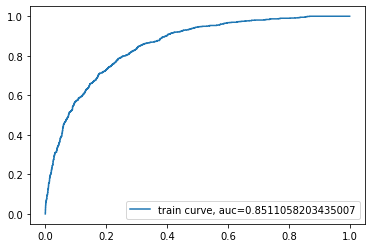

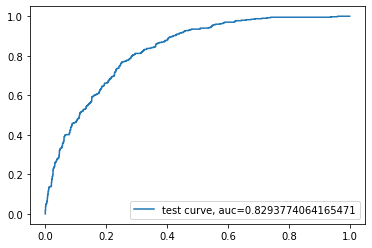

In [119]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [120]:
train_pred = model5.predict(X_train)
test_pred = model5.predict(X_test)

In [121]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.6102075154234435
f1_test =  0.5384615384615384
my_f1_train =  0.6102075154234435
my_f1_test =  0.5384615384615384
recall_train =  0.5522842639593909
recall_test =  0.49122807017543857
my_recall_train =  0.5522842639593909
my_recall_test =  0.49122807017543857
precision_train =  0.681704260651629
precision_test =  0.5957446808510638
my_precision_train =  0.681704260651629
my_precision_test =  0.5957446808510638
accuracy_train =  0.8120097376251014
accuracy_test =  0.78801261829653
my_accuracy_train =  0.8120097376251014
my_accuracy_test =  0.78801261829653


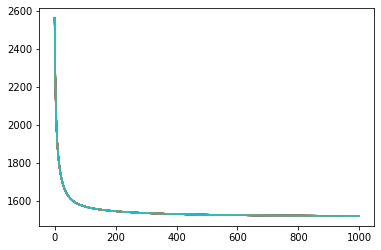

In [122]:
losses = model5.get_losses()
plt.plot(losses)
plt.show()

### MyLogisticRegression + L2

In [123]:
model6 = MyLogisticRegression(lr = 0.1, n_iters=100, penalty='l2', lyambda = 0.001)

In [124]:
start = time.time()
model6.fit(X_train, y_train)
stop = time.time()
y_pred_proba = model6.predict_proba(X_test)
y_train_pred = model6.predict_proba(X_train)

In [125]:
print(f"Training time: {stop - start}s")

Training time: 0.3336350917816162s


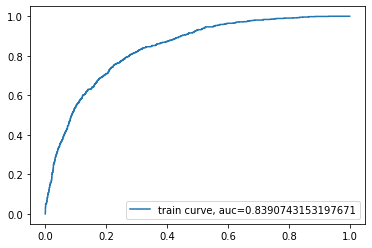

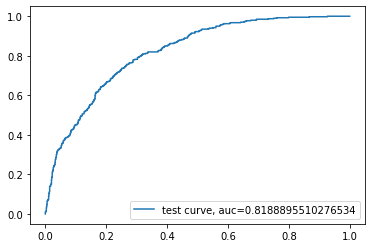

In [126]:
fpr, tpr, _ = metrics.roc_curve(y_train,  y_train_pred)
auc = metrics.roc_auc_score(y_train,  y_train_pred)
plt.plot(fpr,tpr,label="train curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="test curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

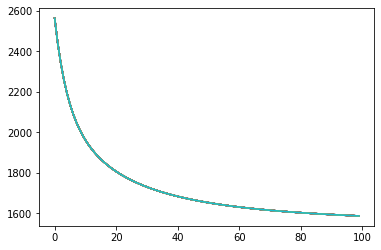

In [127]:
losses = model6.get_losses()
plt.plot(losses)
plt.show()

In [128]:
train_pred = model6.predict(X_train)
test_pred = model6.predict(X_test)

In [129]:
print('f1_train = ', metrics.f1_score(y_train, train_pred))
print('f1_test = ', metrics.f1_score(y_test, test_pred))
print('my_f1_train = ', f1(y_train, train_pred))
print('my_f1_test = ', f1(y_test, test_pred))
print('recall_train = ', metrics.recall_score(y_train, train_pred))
print('recall_test = ', metrics.recall_score(y_test, test_pred))
print('my_recall_train = ', recall(y_train, train_pred))
print('my_recall_test = ', recall(y_test, test_pred))
print('precision_train = ', metrics.precision_score(y_train, train_pred))
print('precision_test = ', metrics.precision_score(y_test, test_pred))
print('my_precision_train = ', precision(y_train, train_pred))
print('my_precision_test = ', precision(y_test, test_pred))
print('accuracy_train = ', metrics.accuracy_score(y_train, train_pred))
print('accuracy_test = ', metrics.accuracy_score(y_test, test_pred))
print('my_accuracy_train = ', accuracy(y_train, train_pred))
print('my_accuracy_test = ', accuracy(y_test, test_pred))

f1_train =  0.5737704918032788
f1_test =  0.5094614264919941
my_f1_train =  0.5737704918032788
my_f1_test =  0.5094614264919941
recall_train =  0.49746192893401014
recall_test =  0.43859649122807015
my_recall_train =  0.49746192893401014
my_recall_test =  0.43859649122807015
precision_train =  0.677731673582296
precision_test =  0.6076388888888888
my_precision_train =  0.677731673582296
my_precision_test =  0.6076388888888888
accuracy_train =  0.8030835812821207
accuracy_test =  0.7873817034700316
my_accuracy_train =  0.8030835812821207
my_accuracy_test =  0.7873817034700316


## Пункт 9

In [130]:
myweights4 = model4.get_weights()
myweights5 = model5.get_weights()
myweights6 = model6.get_weights()

weights1 = model1.coef_
weights2 = model2.coef_
weights3 = model3.coef_

In [131]:
df4 = pd.DataFrame({'weights_for_my_lr' : myweights4})
df5 = pd.DataFrame({'weights_for_my_lr+l1' : myweights5})
df6 = pd.DataFrame({'weights_for_my_lr+l2' : myweights6})

df1 = pd.DataFrame({'weights_for_sklearn_lr' : weights1[0]})
df2 = pd.DataFrame({'weights_for_sklearn_lr+l1' : weights2[0]})
df3 = pd.DataFrame({'weights_for_sklearn_lr+l2' : weights3[0]})

Посмотрим на занулившиеся веса

In [132]:
null_weights = pd.concat([df1[df1['weights_for_sklearn_lr'].between(-0.025, 0.025)], df2[df2['weights_for_sklearn_lr+l1'].between(-0.025, 0.025)], 
                          df3[df3['weights_for_sklearn_lr+l2'].between(-0.025, 0.025)], df4[df4['weights_for_my_lr'].between(-0.025, 0.025)],
                          df5[df5['weights_for_my_lr+l1'].between(-0.025, 0.025)], df6[df6['weights_for_my_lr+l2'].between(-0.025, 0.025)]], axis = 1)

In [133]:
null_weights

,weights_for_sklearn_lr,weights_for_sklearn_lr+l1,weights_for_sklearn_lr+l2,weights_for_my_lr,weights_for_my_lr+l1,weights_for_my_lr+l2
1,NaN,0.000000,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.000260,NaN
4,-0.021473,-0.022008,NaN,NaN,-0.000112,NaN
5,-0.020187,-0.014523,-0.018724,NaN,-0.003840,NaN
8,NaN,0.000000,NaN,NaN,0.000130,NaN
9,NaN,NaN,NaN,NaN,NaN,0.007994
17,NaN,-0.023110,NaN,NaN,NaN,NaN
18,NaN,0.000000,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,0.000401,-0.018273
23,NaN,NaN,NaN,NaN,0.019262,-0.018558


### Итог: наша имплементация логистической регрессии ничуть не хуже имеющийся в sklearn и показывает +- такое же качество на roc-auc